#importing required libraries

In [2]:
import pandas as pd
import networkx as nx
import numpy as np
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from networkx.drawing.layout import bipartite_layout

In [3]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df1 = pd.read_csv('/content/drive/MyDrive/Recipe (1).csv')

#preprocessing of dataset

In [6]:
df1.head()

0            1
0  Balu shahi  Maida flour
1  Balu shahi       yogurt
2  Balu shahi          oil
3  Balu shahi        sugar
4  Balu shahi          Nan

In [7]:
df1.rename(columns = {'0':'Recipe','1':'Ingr'}, inplace = True)

In [8]:
df1 = df1.apply(lambda x: x.str.lower())

In [9]:
df1.replace(to_replace = 'clarified butter', value = 'ghee', inplace=True)

In [10]:
df1.replace(to_replace = 'garam masala powder', value = 'garam masala', inplace=True)

In [11]:
df1 = df1[df1.Ingr != "nan"]

In [12]:
df1.reset_index(inplace = True)

In [13]:
df1.head(10)

index          Recipe         Ingr
0      0      balu shahi  maida flour
1      1      balu shahi       yogurt
2      2      balu shahi          oil
3      3      balu shahi        sugar
4     10          boondi   gram flour
5     11          boondi         ghee
6     12          boondi        sugar
7     20  gajar ka halwa      carrots
8     21  gajar ka halwa         milk
9     22  gajar ka halwa        sugar

In [14]:
df1.tail()

index  Recipe            Ingr
1131   2540  pinaca      brown rice
1132   2541  pinaca    fennel seeds
1133   2542  pinaca  grated coconut
1134   2543  pinaca    black pepper
1135   2544  pinaca   ginger powder

In [15]:
df1.drop(df1[df1['Recipe'] == "imarti"].index, inplace = True)

In [16]:
df1.drop(df1[df1['Recipe'] == "bhatura"].index, inplace = True)

In [17]:
df1.drop(df1[df1['Recipe'] == "sevai"].index, inplace = True)

In [18]:
df1.drop(df1[df1['Recipe'] == "khaman"].index, inplace = True)

In [19]:
df1.drop(df1[df1['Recipe'] == "boondi"].index, inplace = True)

In [20]:
df1.drop(df1[df1['Recipe'] == "brown rice"].index, inplace = True)

In [21]:
df1.reset_index(inplace = True)

In [22]:
df1.to_csv('recipes_bipartite.csv')

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   level_0  1115 non-null   int64 
 1   index    1115 non-null   int64 
 2   Recipe   1115 non-null   object
 3   Ingr     1115 non-null   object
dtypes: int64(2), object(2)
memory usage: 35.0+ KB


#creating bipartite graph

In [24]:
set1 = []
set1 = df1['Recipe'].tolist()
set1 = set(set1)
set1 = list(set1)

In [25]:
len(set1)

249

In [26]:
set2 = []
set2 = df1['Ingr'].tolist()
set2 = set(set2)
set2 = list(set2)

In [27]:
len(set2)

360

In [28]:
set(set1).intersection(set(set2))

set()

In [29]:
recipe_graph = nx.Graph()
recipe_graph.add_nodes_from(set1,bipartite=1)
recipe_graph.add_nodes_from(set2,bipartite=0)

In [30]:
for i in range(len(df1)):
  k1 = df1['Recipe'][i]
  k2 = df1['Ingr'][i]
  recipe_graph.add_edges_from([(k1,k2)])

In [31]:
bipartite.is_bipartite(recipe_graph)

True

In [32]:
fig = plt.figure(1, figsize=(200, 80), dpi=60)
nx.draw(recipe_graph,with_labels=True)
plt.savefig("graph.png")


In [33]:
X, Y = bipartite.sets(recipe_graph)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) )
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) 
plt.figure(3,figsize=(300,300)) 
nx.draw(recipe_graph, pos=pos, with_labels=True,node_size=100)
plt.savefig("graph2.png")

#Association rule mining

In [36]:
data = pd.read_excel("/content/drive/MyDrive/indian_food.xlsx")
data

name                                        ingredients  \
0        Balu shahi                    Maida flour, yogurt, oil, sugar   
1            Boondi                            Gram flour, ghee, sugar   
2    Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3            Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4       Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   
..              ...                                                ...   
250       Til Pitha            Glutinous rice, black sesame seeds, gur   
251         Bebinca  Coconut milk, egg yolks, clarified butter, all...   
252          Shufta  Cottage cheese, dry dates, dried rose petals, ...   
253       Mawa Bati  Milk powder, dry fruits, arrowroot powder, all...   
254          Pinaca  Brown rice, fennel seeds, grated coconut, blac...   

           diet  prep_time  cook_time flavor_profile   course  \
0    vegetarian       45.0       25.0          sweet  dessert   
1    vegetarian       80.0       30.0          sweet  dessert   
2    vegetarian       15.0       60.0          sweet  dessert   
3    vegetarian       15.0       30.0          sweet  dessert   
4    vegetarian       15.0       40.0          sweet  dessert   
..          ...        ...        ...            ...      ...   
250  vegetarian        5.0       30.0          sweet  dessert   
251  vegetarian       20.0       60.0          sweet  dessert   
252  vegetarian       -1.0       -1.0          sweet  dessert   
253  vegetarian       20.0       45.0          sweet  dessert   
254  vegetarian       -1.0       -1.0          sweet  dessert   

               state      region  
0        West Bengal        East  
1          Rajasthan        West  
2             Punjab       North  
3          Rajasthan        West  
4        West Bengal        East  
..               ...         ...  
250            Assam  North East  
251              Goa        West  
252  Jammu & Kashmir       North  
253   Madhya Pradesh     Central  
254              Goa        West  

[255 rows x 9 columns]

In [37]:
diet = input("enter your prefered diet ")
flavor = input("enter your prefered flavor profile ")
course = input("enter your prefered course ")

enter your prefered diet vegetarian
enter your prefered flavor profile sweet
enter your prefered course dessert


In [38]:
filtered = data.loc[data['diet']==diet]
filtered = data.loc[data['flavor_profile']==flavor]
filtered = data.loc[data['course']==course]
display = pd.DataFrame({'name':filtered['name'],'ingredients':filtered['ingredients']})
display

name                                        ingredients
0        Balu shahi                    Maida flour, yogurt, oil, sugar
1            Boondi                            Gram flour, ghee, sugar
2    Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins
3            Ghevar  Flour, ghee, kewra, milk, clarified butter, su...
4       Gulab jamun  Milk powder, plain flour, baking powder, ghee,...
..              ...                                                ...
250       Til Pitha            Glutinous rice, black sesame seeds, gur
251         Bebinca  Coconut milk, egg yolks, clarified butter, all...
252          Shufta  Cottage cheese, dry dates, dried rose petals, ...
253       Mawa Bati  Milk powder, dry fruits, arrowroot powder, all...
254          Pinaca  Brown rice, fennel seeds, grated coconut, blac...

[85 rows x 2 columns]

In [39]:
count = 0
basket = []
for i in display['ingredients']:
    string = str(i)
    temp = [x.strip() for x in string.split(',')]
    basket.append(temp)
basket

[['Maida flour', 'yogurt', 'oil', 'sugar'],
 ['Gram flour', 'ghee', 'sugar'],
 ['Carrots', 'milk', 'sugar', 'ghee', 'cashews', 'raisins'],
 ['Flour',
  'ghee',
  'kewra',
  'milk',
  'clarified butter',
  'sugar',
  'almonds',
  'pistachio',
  'saffron',
  'green cardamom'],
 ['Milk powder',
  'plain flour',
  'baking powder',
  'ghee',
  'milk',
  'sugar',
  'water',
  'rose water'],
 ['Sugar syrup', 'lentil flour'],
 ['Maida',
  'corn flour',
  'baking soda',
  'vinegar',
  'curd',
  'water',
  'turmeric',
  'saffron',
  'cardamom'],
 ['Cashews', 'ghee', 'cardamom', 'sugar'],
 ['Milk', 'cottage cheese', 'sugar'],
 ['Milk', 'rice', 'sugar', 'dried fruits'],
 ['Gram flour', 'ghee', 'sugar'],
 ['Yogurt', 'milk', 'nuts', 'sugar'],
 ['Refined flour',
  'besan',
  'ghee',
  'powdered sugar',
  'yoghurt',
  'green cardamom'],
 ['Firm white pumpkin', 'sugar', 'kitchen lime', 'alum powder'],
 ['Rice', 'sugar', 'nuts'],
 ['Condensed milk', 'sugar', 'spices', 'nuts'],
 ['Semolina', 'ghee', 'nut

In [40]:
from mlxtend.preprocessing import TransactionEncoder

transact = TransactionEncoder()
transact_ary = transact.fit(basket).transform(basket)
data = pd.DataFrame(transact_ary, columns=transact.columns_)
data

Apricots  Baking soda  Basmati rice  Besan  Besan flour  Black lentils  \
0      False        False         False  False        False          False   
1      False        False         False  False        False          False   
2      False        False         False  False        False          False   
3      False        False         False  False        False          False   
4      False        False         False  False        False          False   
..       ...          ...           ...    ...          ...            ...   
80     False        False         False  False        False          False   
81     False        False         False  False        False          False   
82     False        False         False  False        False          False   
83     False        False         False  False        False          False   
84     False        False         False  False        False          False   

    Bottle gourd  Brown rice  Carrots  Cashews  ...  sugar syrup  \
0          False       False    False    False  ...        False   
1          False       False    False    False  ...        False   
2          False       False     True    False  ...        False   
3          False       False    False    False  ...        False   
4          False       False    False    False  ...        False   
..           ...         ...      ...      ...  ...          ...   
80         False       False    False    False  ...        False   
81         False       False    False    False  ...        False   
82         False       False    False    False  ...        False   
83         False       False    False    False  ...        False   
84         False        True    False    False  ...        False   

    sweetened milk  turmeric  vegetable oil  vinegar  water  wheat flour  \
0            False     False          False    False  False        False   
1            False     False          False    False  False        False   
2            False     False          False    False  False        False   
3            False     False          False    False  False        False   
4            False     False          False    False   True        False   
..             ...       ...            ...      ...    ...          ...   
80           False     False          False    False  False        False   
81           False     False          False    False  False        False   
82           False     False          False    False  False        False   
83           False     False          False    False  False        False   
84           False     False          False    False  False        False   

    white bread slices  yoghurt  yogurt  
0                False    False    True  
1                False    False   False  
2                False    False   False  
3                False    False   False  
4                False    False   False  
..                 ...      ...     ...  
80               False    False   False  
81               False    False   False  
82               False    False   False  
83               False    False   False  
84               False    False   False  

[85 rows x 144 columns]

In [41]:
from mlxtend.frequent_patterns import apriori

apriori(data,min_support=0.02,use_colnames=True)

support                    itemsets
0    0.023529               (Besan flour)
1    0.023529                    (Chenna)
2    0.070588                    (Chhena)
3    0.023529            (Condensed milk)
4    0.035294                     (Flour)
..        ...                         ...
101  0.035294  (saffron, cardamom, sugar)
102  0.023529      (ghee, jaggery, sugar)
103  0.047059         (sugar, ghee, milk)
104  0.023529     (semolina, ghee, sugar)
105  0.023529      (sugar, raisins, milk)

[106 rows x 2 columns]

Projection of Bipartite graph w.r.t Recipes

In [42]:
projection_recipes = bipartite.projected_graph(recipe_graph,set1)
projection_recipes.edges()

EdgeView([('bhakri', 'thepla'), ('bhakri', 'churma ladoo'), ('bhakri', 'patra'), ('bhakri', 'bengena pitika'), ('bhakri', 'currivepillai sadam '), ('bhakri', 'pattor'), ('bhakri', 'khichu'), ('bhakri', 'thalipeeth'), ('bhakri', 'chicken razala'), ('bhakri', 'muthiya'), ('goja', 'gud papdi'), ('goja', 'bebinca'), ('goja', 'mawa bati'), ('goja', 'ghevar'), ('goja', 'sheera'), ('goja', 'ledikeni'), ('goja', 'kaju katli'), ('goja', 'balu shahi'), ('goja', 'aloo methi'), ('goja', 'gulab jamun'), ('goja', 'nankhatai'), ('goja', 'pootharekulu'), ('goja', 'chapati'), ('goja', 'mihidana'), ('goja', 'malapua'), ('goja', 'ariselu'), ('goja', 'payokh'), ('goja', 'jalebi'), ('goja', 'ghooghra'), ('goja', 'dudhi halwa'), ('goja', 'turiya patra vatana sabji'), ('goja', 'sohan halwa'), ('goja', 'obbattu holige'), ('goja', 'gajar ka halwa'), ('goja', 'sukhdi'), ('goja', 'pongal'), ('goja', 'paniyaram'), ('goja', 'mysore pak'), ('goja', 'pantua'), ('goja', 'mag dhokli'), ('goja', 'khichu'), ('goja', 'ch

In [43]:
projection_ingredients = bipartite.projected_graph(recipe_graph,set2)
projection_ingredients.edges()

EdgeView([('malvani masala', 'bombay rava'), ('malvani masala', 'green chilies'), ('malvani masala', 'rice flour'), ('malvani masala', 'bombay duck'), ('coconut oil', 'chicken'), ('coconut oil', 'green chillies'), ('coconut oil', 'arhar dal'), ('coconut oil', 'fresh coconut'), ('coconut oil', 'red chilli'), ('coconut oil', 'spinach'), ('coconut oil', 'bottle gourd'), ('coconut oil', 'cinnamon'), ('coconut oil', 'ginger'), ('coconut oil', 'green'), ('coconut oil', 'urad dal'), ('coconut oil', 'garam masala'), ('coconut oil', 'wine vinegar'), ('coconut oil', 'cucumber'), ('coconut oil', 'mustard seeds'), ('coconut oil', 'baingan'), ('coconut oil', 'curry leaves'), ('coconut oil', 'curd'), ('coconut oil', 'chana dal'), ('coconut oil', 'moong dal'), ('coconut oil', 'fish'), ('dried fruits', 'sugar'), ('dried fruits', 'rice'), ('dried fruits', 'milk'), ('green chili paste', 'green chili'), ('green chili paste', 'curry leaves'), ('green chili paste', 'gram flour'), ('green chili paste', 'whi

#Health Suggestions

How many common ingredients between two recipes

In [44]:
common_ingredients = bipartite.generic_weighted_projected_graph(recipe_graph,set1)
print("--- Similarity Scores between two recipes ---")
similar = list(common_ingredients.edges(data='weight'))

--- Similarity Scores between two recipes ---


In [45]:
import requests
def get_healthscores(recipe):
    url = "https://calorieninjas.p.rapidapi.com/v1/nutrition"

    querystring = {"query":recipe}

    headers = {
     "X-RapidAPI-Key": "f45a109323msh0d7a964746c0587p169d05jsnc19e066174bc",
     "X-RapidAPI-Host": "calorieninjas.p.rapidapi.com"
    }

    response = requests.request("GET", url, headers=headers, params=querystring)

    return response.text

In [171]:
recipe = input("Enter recipe ")

Enter recipe gulab jamun


In [172]:
print(get_healthscores(recipe))

{"items": [{"sugar_g": 35.9, "fiber_g": 0.1, "serving_size_g": 100.0, "sodium_mg": 88, "name": "gulab jamun", "potassium_mg": 109, "fat_saturated_g": 3.1, "fat_total_g": 14.6, "calories": 293.7, "cholesterol_mg": 11, "protein_g": 3.9, "carbohydrates_total_g": 39.7}]}


In [173]:
for x in similar:
  if x[0] == recipe and x[2]>=2:
    temp = get_healthscores(x[1])
    # print(len(temp))

    if(len(temp)==13):
      continue
    else:
      print(x[1])
      print(temp)
      print('\n')

chak hao kheer
{"items": [{"sugar_g": 11.2, "fiber_g": 0.3, "serving_size_g": 100.0, "sodium_mg": 37, "name": "kheer", "potassium_mg": 95, "fat_saturated_g": 1.9, "fat_total_g": 4.7, "calories": 115.2, "cholesterol_mg": 8, "protein_g": 3.7, "carbohydrates_total_g": 15.1}]}


payasam
{"items": [{"sugar_g": 11.1, "fiber_g": 0.3, "serving_size_g": 100.0, "sodium_mg": 37, "name": "payasam", "potassium_mg": 96, "fat_saturated_g": 1.9, "fat_total_g": 4.7, "calories": 114.8, "cholesterol_mg": 8, "protein_g": 3.7, "carbohydrates_total_g": 15.4}]}




#Square Clustering

square clustering - The probability that two neighbors of node v share a common neighbor different from v

In [107]:
nx.square_clustering(recipe_graph,nodes=set1)

{'bhakri': 0.0,
 'goja': 0.021739130434782608,
 'karela bharta': 0.022222222222222223,
 'naan': 0.0,
 'kaara kozhambu': 0.012658227848101266,
 'ghevar': 0.05504587155963303,
 'sheera': 0.056818181818181816,
 'ledikeni': 0.15492957746478872,
 'dosa': 0.0738255033557047,
 'kuzhakkattai': 0.034482758620689655,
 'coconut vadi': 0.02564102564102564,
 'navrattan korma': 0.010309278350515464,
 'lyangcha': 0.0,
 'gatta curry': 0.017543859649122806,
 'poriyal': 0.07317073170731707,
 'lauki ke kofte': 0.05846153846153846,
 'pattor': 0.17333333333333334,
 'idiappam': 0.0,
 'chakali': 0.014492753623188406,
 'sev tameta': 0.022222222222222223,
 'lassi': 0.09223300970873786,
 'aloo tikki': 0.030927835051546393,
 'mihidana': 0.13043478260869565,
 'halvasan': 0.0,
 'kuzhambu': 0.044897959183673466,
 'rajma chaval': 0.07122507122507123,
 'vada': 0.055900621118012424,
 'pani pitha': 0.0,
 'poornalu': 0.0,
 'jalebi': 0.019830028328611898,
 'bajri no rotlo': 0.0,
 'ghooghra': 0.03225806451612903,
 'koldil

#Degree Analysis

Each recipe and ingredients degree

In [108]:
ingredients, recipe = bipartite.degrees(recipe_graph, set1)

In [109]:
ingredients

DegreeView({'malvani masala': 1, 'coconut oil': 6, 'dried fruits': 1, 'green chili paste': 1, 'avocado oil': 2, 'brinjal': 2, 'raw rice': 4, 'black pepper': 5, 'dry fruits': 4, 'skinless chicken breasts': 1, 'split urad dal': 2, 'pav bhaji masala': 1, 'almonds': 3, 'fish fillet': 1, 'chickpea flour': 3, 'garlic': 8, 'pork': 1, 'reduced milk': 1, 'loaf bread': 1, 'gooseberry': 1, 'vermicelli pudding': 1, 'whole wheat rava': 1, 'green garlic chutney': 1, 'almond': 1, 'rock salt': 2, 'rose water': 4, 'baking soda': 7, 'masoor dal': 1, 'cinnamon': 6, 'sorghum flour': 1, 'khaman': 1, 'tea bags': 1, 'fermented bamboo shoot': 1, 'filling': 1, 'ghee': 32, 'coriander': 2, 'edible gum': 2, 'desiccated coconut': 2, 'star anise': 2, 'sooji': 1, 'cardamom': 9, 'ladies finger': 1, 'musk melon seeds': 1, 'red chillies': 1, 'sesame oil': 4, 'moong dal': 7, 'fenugreek seeds': 1, 'sunflower oil': 1, 'banana': 3, 'carrots': 1, 'tomatoes': 7, 'split pigeon peas': 1, 'spinach': 2, 'pav': 1, 'greens': 1, 'r

Visualizing the degrees

In [110]:
import matplotlib.pyplot as plt
from collections import Counter

ingredients_dist = Counter(sorted(dict(ingredients).values()))
recipe_dist = Counter(sorted(dict(recipe).values()))

In [111]:
ingredients_dist

Counter({1: 203,
         2: 52,
         3: 25,
         4: 16,
         5: 14,
         6: 14,
         7: 9,
         8: 4,
         9: 2,
         10: 4,
         11: 2,
         12: 4,
         16: 2,
         19: 1,
         21: 2,
         25: 2,
         29: 1,
         32: 1,
         40: 1,
         47: 1})

In [112]:
def plot_twonode_dist(top_dist,bottom_dist):
  fig = plt.figure(figsize=(12,4),dpi=500)
  ax = [fig.add_subplot(1,2,i+1) for i in range(2)]

  ax[0].plot(list(top_dist.keys()),list(top_dist.values()),'bo',linestyle='-',label = 'Ingredients size')
  ax[1].plot(list(bottom_dist.keys()),list(bottom_dist.values()),'bo',linestyle='-',label = 'Recipe size')

  for axis in ax:
    axis.set_ylabel('Frequency',fontsize=10)
    axis.tick_params(axis='both',which='major',labelsize=16)
    axis.legend(loc='upper right',fontsize=12,ncol=1,frameon=True)

  ax[0].set_xlabel('Degree',fontsize=10)
  ax[1].set_xlabel('Degree',fontsize=10)

  plt.tight_layout()
  plt.show()

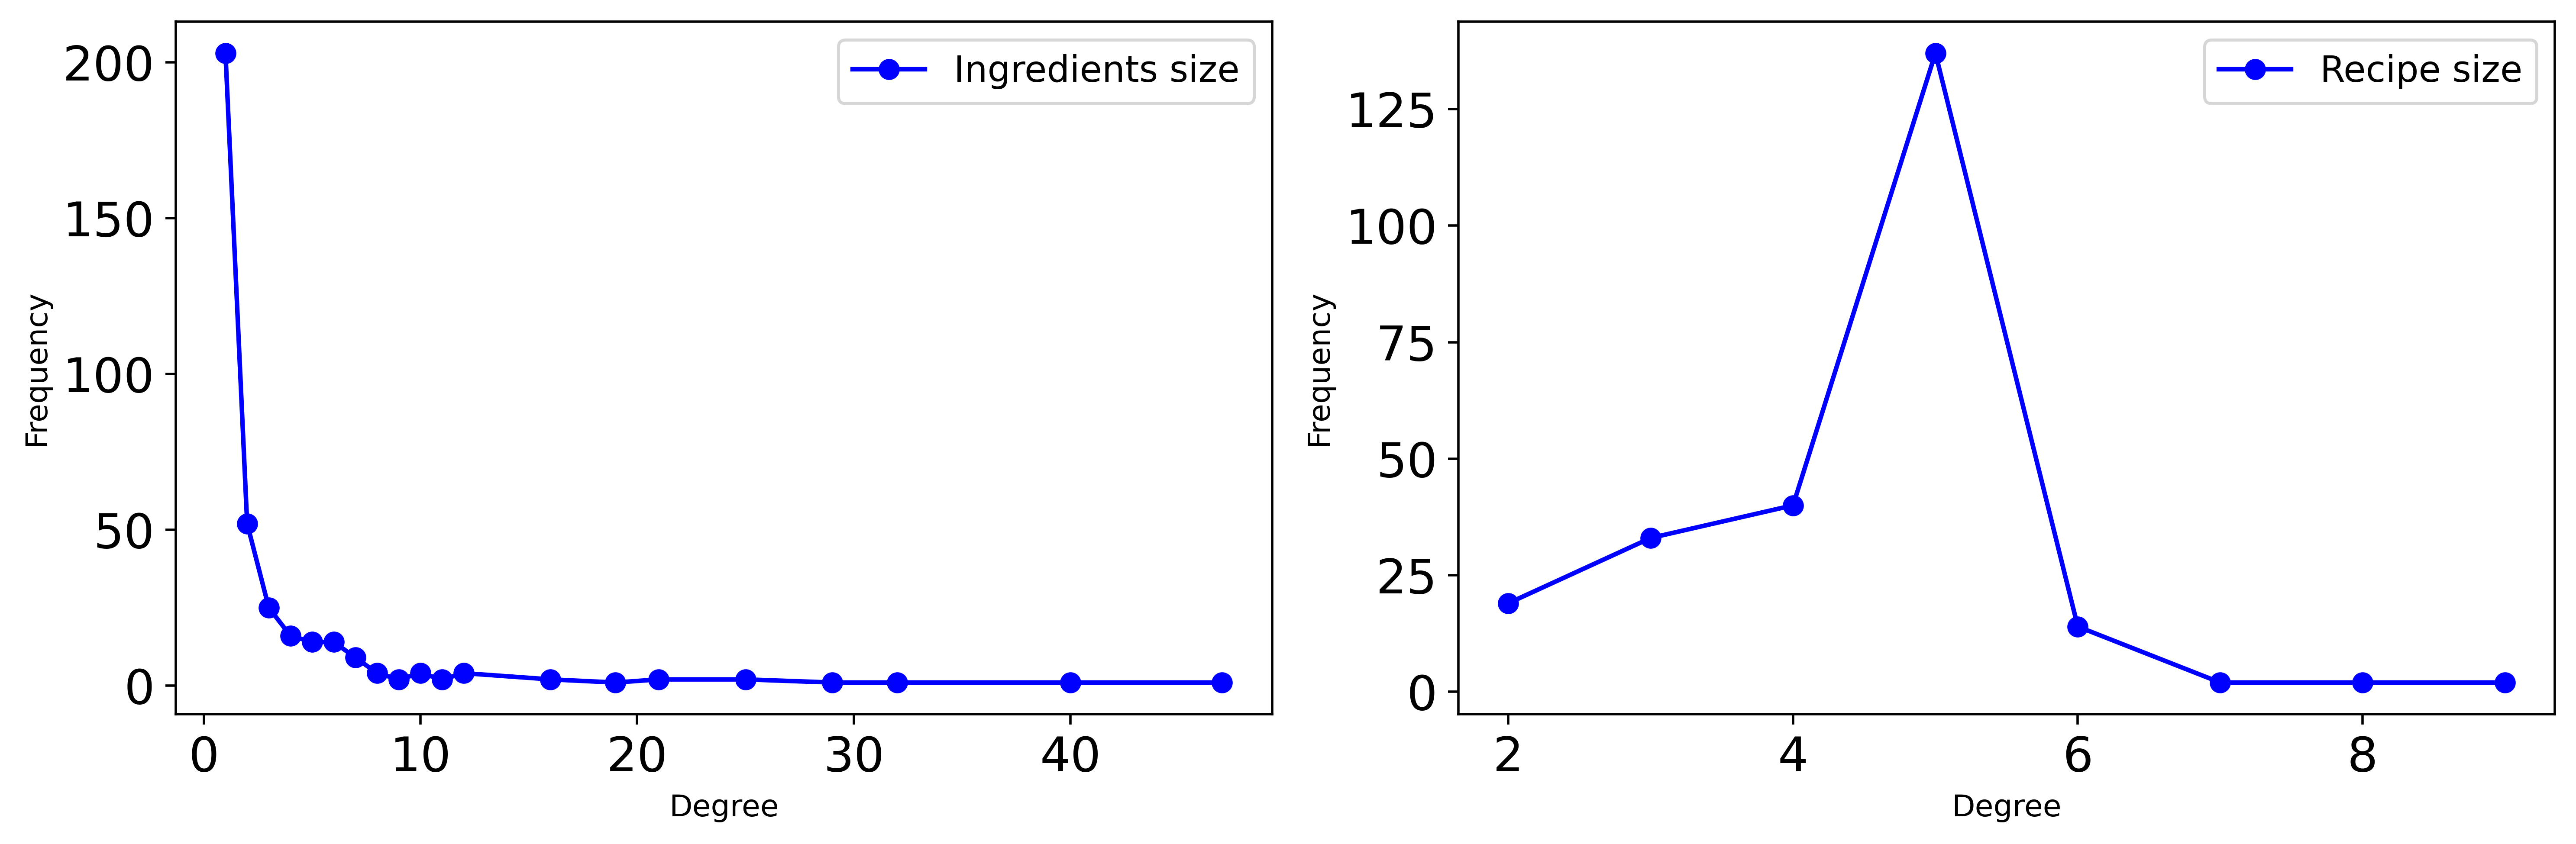

In [113]:
plot_twonode_dist(ingredients_dist,recipe_dist)

In [114]:
Gs = bipartite.projected_graph(recipe_graph,set1)
Gm = bipartite.projected_graph(recipe_graph,set1,'MultiGraph')

In [115]:
popularity_distribution = Counter(sorted(dict(Gs.degree()).values()))
strength_distribution =   Counter(sorted(dict(Gm.degree()).values()))

In [174]:
def plot_proj_dist(pop_dist,str_dist):
  fig,ax = plt.subplots()

  ax.plot(list(pop_dist.keys()),list(pop_dist.values()),'bo',linestyle='-',label='Popularity')
  ax.plot(list(str_dist.keys()),list(str_dist.values()),'ro',linestyle='-',label='Strength')

  ax.set_xlabel('Degree',fontsize=18)
  ax.set_ylabel('Frequency',fontsize=18)
  ax.tick_params(axis='both',which='major',labelsize=16)
  ax.legend(loc='upper right',fontsize=12,ncol=1,frameon=True)

  plt.tight_layout()
  plt.show()

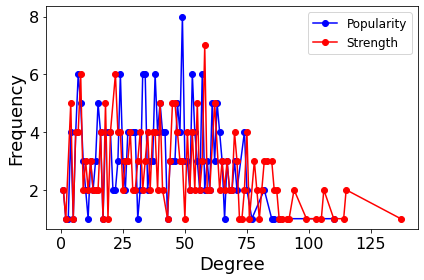

In [117]:
plot_proj_dist(popularity_distribution,strength_distribution)

In [118]:
def get_highest(degree_dict,degree_type):
  q = Counter(dict(degree_dict))
  print('Highest '+ degree_type)
  for x,y in q.most_common(10):
    print('%s : %i'% (x,y))

Most used Ingredients

In [119]:
get_highest(ingredients,'Ingredients')

Highest Ingredients
sugar : 47
garam masala : 40
ghee : 32
ginger : 29
curry leaves : 25
urad dal : 25
milk : 21
rice flour : 21
jaggery : 19
tomato : 16


Recipes that uses most ingredients

In [120]:
get_highest(recipe,'Recipes')

Highest Recipes
ghevar : 9
jalebi : 9
mysore pak : 8
gulab jamun : 8
bandar laddu : 7
obbattu holige : 7
koldil duck : 6
gajar ka halwa : 6
thayir sadam : 6
sabudana khichadi : 6


In [121]:
get_highest(Gs.degree(),'Popularity')

Highest Popularity
upma : 110
keerai masiyal : 88
sev tameta : 86
gavvalu : 85
mysore pak : 82
kadhi pakoda : 82
sohan papdi : 77
bandar laddu : 75
beef fry : 75
ghevar : 74


In [122]:
get_highest(Gm.degree(),'Strength')

Highest Strength
upma : 137
ghevar : 115
sohan papdi : 115
mysore pak : 114
gavvalu : 110
gajar ka halwa : 106
gulab jamun : 106
kadhi pakoda : 105
keerai masiyal : 103
bandar laddu : 99


#Community Detection

weighted projected graph - The specified nodes with weights representing the number of shared neighbors

In [125]:
Gw1 = bipartite.weighted_projected_graph(recipe_graph,set1)

In [126]:
import community
from community import community_louvain
comm_dict = community_louvain.best_partition(Gw1)
print(comm_dict)

comm_set = set(list(comm_dict.values()))
print(comm_set)

comm_org = {comm:[] for comm in list(comm_set)}
for node, comm in comm_dict.items():
  comm_org[comm].append(node)
print(comm_org) 

{'bhakri': 1, 'goja': 1, 'karela bharta': 3, 'naan': 1, 'kaara kozhambu': 2, 'ghevar': 0, 'sheera': 0, 'ledikeni': 0, 'dosa': 2, 'kuzhakkattai': 1, 'coconut vadi': 0, 'navrattan korma': 3, 'lyangcha': 0, 'gatta curry': 3, 'poriyal': 2, 'lauki ke kofte': 3, 'pattor': 1, 'idiappam': 1, 'chakali': 1, 'sev tameta': 0, 'lassi': 0, 'aloo tikki': 3, 'mihidana': 0, 'halvasan': 2, 'kuzhambu': 2, 'rajma chaval': 3, 'vada': 2, 'pani pitha': 1, 'poornalu': 1, 'jalebi': 0, 'bajri no rotlo': 1, 'ghooghra': 1, 'koldil duck': 1, 'turiya patra vatana sabji': 0, 'churma ladoo': 1, 'methi na gota': 1, 'gajar ka halwa': 0, 'palathalikalu': 1, 'kakinada khaja': 0, 'sukhdi': 1, 'pongal': 1, 'luchi': 1, 'kanji': 1, 'biryani': 3, 'papad': 2, 'keerai masiyal': 2, 'mag dhokli': 1, 'thayir sadam': 2, 'koldil chicken': 3, 'red rice': 3, 'palak paneer': 3, 'masor koni': 3, 'bora sawul': 2, 'adhirasam': 1, 'idli': 2, 'kos kootu': 2, 'shahi tukra': 0, 'pav bhaji': 2, 'sandesh': 0, 'konir dom': 3, 'sandige': 2, 'khee

In [127]:
Gw2 = bipartite.weighted_projected_graph(recipe_graph,set2)

In [128]:
import community
from community import community_louvain
comm_dict = community_louvain.best_partition(Gw2)
#comm_dict = community.best_partition(Gw2)
print(comm_dict)

comm_set = set(list(comm_dict.values()))
print(comm_set)

comm_org = {comm:[] for comm in list(comm_set)}
for node, comm in comm_dict.items():
  comm_org[comm].append(node)
print(comm_org) 

{'malvani masala': 0, 'coconut oil': 1, 'dried fruits': 2, 'green chili paste': 1, 'avocado oil': 1, 'brinjal': 3, 'raw rice': 0, 'dry fruits': 2, 'black pepper': 4, 'skinless chicken breasts': 5, 'split urad dal': 1, 'pav bhaji masala': 3, 'almonds': 2, 'fish fillet': 1, 'chickpea flour': 4, 'garlic': 3, 'pork': 2, 'reduced milk': 2, 'loaf bread': 2, 'gooseberry': 1, 'vermicelli pudding': 2, 'whole wheat rava': 7, 'green garlic chutney': 0, 'almond': 1, 'rock salt': 1, 'rose water': 2, 'baking soda': 2, 'masoor dal': 1, 'cinnamon': 3, 'khaman': 6, 'sorghum flour': 7, 'tea bags': 3, 'fermented bamboo shoot': 3, 'filling': 3, 'ghee': 2, 'coriander': 3, 'edible gum': 7, 'desiccated coconut': 2, 'star anise': 6, 'sooji': 4, 'cardamom': 2, 'ladies finger': 3, 'musk melon seeds': 7, 'red chillies': 0, 'sesame oil': 0, 'moong dal': 1, 'fenugreek seeds': 1, 'sunflower oil': 2, 'banana': 0, 'carrots': 2, 'tomatoes': 3, 'split pigeon peas': 1, 'spinach': 1, 'pav': 6, 'greens': 1, 'red onion': 3

#Hubs and Authorities 

In [129]:
hubs, authorities = nx.hits(projection_ingredients, max_iter = 50, normalized = True)

h = []
for i in hubs:
    h.append([i,hubs[i]])
h.sort(reverse = True, key=lambda x:x[1])
print('HUBS:')
for i in h[:5]:
    print(i)
    
a = []
for i in authorities:
    a.append([i,authorities[i]])
a.sort(reverse = True, key=lambda x:x[1])
print('\nAUTHORITIES:')
for i in a[:5]:
    print(i)

HUBS:
['garam masala', 0.021088727195508777]
['sugar', 0.01967239886844506]
['ginger', 0.018820823068780176]
['urad dal', 0.01706274959574895]
['curry leaves', 0.016058999837057924]

AUTHORITIES:
['garam masala', 0.021088727195508767]
['sugar', 0.01967239886844505]
['ginger', 0.018820823068780176]
['urad dal', 0.017062749595748942]
['curry leaves', 0.01605899983705792]


#Page Rank

To give importance score for each ingredient according to the network

In [130]:
pr = nx.pagerank(projection_ingredients)
pagerank = []
for i in pr:
    pagerank.append([i,pr[i]])
pagerank.sort(reverse = True, key = lambda x:x[1])
print('PANGERANK of ingredients:')
for i in pagerank[:25]:
    print(i)

PANGERANK of ingredients:
['garam masala', 0.024821898074222092]
['sugar', 0.021400151021132425]
['ginger', 0.01825845704739569]
['urad dal', 0.0163142282254663]
['ghee', 0.015218930386972581]
['curry leaves', 0.013916506370917035]
['rice flour', 0.011868711592917386]
['tomato', 0.011572770627842323]
['jaggery', 0.010934329172762446]
['chana dal', 0.010139395637699479]
['coconut', 0.00996813764498998]
['milk', 0.009587914657789257]
['mustard oil', 0.009136382519499615]
['turmeric', 0.008927792750846819]
['whole wheat flour', 0.008656259493036268]
['wheat flour', 0.00851042307554951]
['saffron', 0.008386569992201099]
['potato', 0.008009248086406507]
['gram flour', 0.007439214749621053]
['sesame seeds', 0.007323126176137095]
['mustard seeds', 0.007131508572626138]
['lemon juice', 0.007037471445581911]
['baking soda', 0.006998948042578402]
['lemon', 0.006878353391311815]
['garlic', 0.006837408933457548]


#Matching

Maximum cardinality matching - matching is considered as a maximum cardinality matching if it contains the largest possible number of edges. As each edge will cover exactly two vertices, it is equivalent to finding a matching that covers as many vertices as possible.

In [131]:
my_matching = bipartite.matching.hopcroft_karp_matching(recipe_graph, set1)

In [132]:
my_matching

{'bhakri': 'jowar flour',
 'goja': 'baking soda',
 'karela bharta': 'amchur powder',
 'naan': 'honey',
 'kaara kozhambu': 'drumstick',
 'ghevar': 'kewra',
 'sheera': 'semolina',
 'ledikeni': 'chhena',
 'dosa': 'whole urad dal',
 'kuzhakkattai': 'raw rice',
 'coconut vadi': 'condensed milk',
 'navrattan korma': 'green beans',
 'lyangcha': 'fried milk power',
 'gatta curry': 'sauce',
 'poriyal': 'urad dal',
 'lauki ke kofte': 'chillies',
 'pattor': 'arbi ke patte',
 'chakali': 'red chilli',
 'idiappam': 'hot water',
 'sev tameta': 'sev',
 'lassi': 'yogurt',
 'aloo tikki': 'potato',
 'mihidana': 'besan flour',
 'halvasan': 'whole wheat rava',
 'kuzhambu': 'pearl onions',
 'rajma chaval': 'red kidney beans',
 'vada': 'green chilies',
 'pani pitha': 'tea leaves',
 'poornalu': 'chana dal',
 'jalebi': 'vinegar',
 'bajri no rotlo': 'pearl millet flour',
 'ghooghra': 'all purpose flour',
 'koldil duck': 'mutton',
 'turiya patra vatana sabji': 'grated coconut',
 'churma ladoo': 'khus khus',
 'me